<a href="https://colab.research.google.com/github/SundaresanMS/kaggle_competitions/blob/master/ATM_AMOUNT_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer 
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

Saving ATM_Withdrawl_Prediction_Data.csv to ATM_Withdrawl_Prediction_Data.csv


In [0]:
df = pd.read_csv('ATM_Withdrawl_Prediction_Data.csv')

In [0]:
df.head()

,ID,Number of Shops Around ATM,ATM Zone,No of Other ATMs in 1 KM radius,Estimated Number of Houses in 1 KM Radius,ATM Placement,ATM TYPE,ATM Location TYPE,ATM looks,ATM Near,Avg Withdrawls Per Hour,ATM Attached to,Avg No of Withdrawls Per Week,Average Wait Time,Day Type,ATM RATING,ATM Prox,ATM Since,Holiday Sequence,AmountWithDrawn
0,TS000000001,66,RL,65,8450,Facing Road,Urban,Only WIthdraw,Normal,College,7,Building,856,3,Working,4,Attached to Branch,2008,WW,209500
1,TS000000002,26,RL,80,9600,Facing Road,Urban,Only WIthdraw,Normal,Temple,6,Building,1262,3,Working,3,Attached to Branch,2007,WW,184300
2,TS000000003,65,RL,68,11250,Facing Road,Town,Only WIthdraw,Normal,College,7,Building,920,3,Working,4,Attached to Branch,2008,WW,231500
3,TS000000004,80,RL,60,9550,Facing Road,Town,Only WIthdraw,Normal,Shopping Complex,7,Building,961,3,Working,4,2 ATM Machines (Same Bank),2006,HH,143600
4,TS000000005,66,RL,84,14260,Facing Road,Town,Only WIthdraw,Normal,Park,8,Building,1145,4,Working,4,Attached to Branch,2008,WW,255600


In [0]:
df.tail()

,ID,Number of Shops Around ATM,ATM Zone,No of Other ATMs in 1 KM radius,Estimated Number of Houses in 1 KM Radius,ATM Placement,ATM TYPE,ATM Location TYPE,ATM looks,ATM Near,Avg Withdrawls Per Hour,ATM Attached to,Avg No of Withdrawls Per Week,Average Wait Time,Day Type,ATM RATING,ATM Prox,ATM Since,Holiday Sequence,AmountWithDrawn
186875,TS000186876,62,RL,62,7917,Facing Road,Urban,Only WIthdraw,Normal,Lodge and Hotel,6,Building,953,3,Working,3,Attached to Branch,2007,WW,179700
186876,TS000186877,26,RL,85,13175,Facing Road,Urban,Only WIthdraw,Normal,Market,6,Building,2073,3,Working,3,Attached to Branch,2010,WW,215600
186877,TS000186878,80,RL,66,9042,Facing Road,Urban,Only WIthdraw,Normal,Shopping Complex,7,Building,1188,4,Working,4,Attached to Branch,2010,WW,267800
186878,TS000186879,21,RL,68,9717,Facing Road,Urban,Only WIthdraw,Normal,Highway,5,Petrol Bunk,1078,2,Working,4,Attached to Branch,2010,WW,147525
186879,TS000186880,21,RL,75,9937,Facing Road,Urban,Only WIthdraw,Normal,Church,5,Building,1256,3,Working,3,Attached to Branch,2008,WW,152100


In [0]:
df.columns.values

array(['ID', 'Number of Shops Around ATM', 'ATM Zone',
       'No of Other ATMs in 1 KM radius',
       'Estimated Number of Houses in 1 KM Radius', 'ATM Placement',
       'ATM TYPE', 'ATM Location TYPE', 'ATM looks', 'ATM Near',
       'Avg Withdrawls Per Hour', 'ATM Attached to',
       'Avg No of Withdrawls Per Week', 'Average Wait Time', 'Day Type',
       'ATM RATING', 'ATM Prox', 'ATM Since', 'Holiday Sequence',
       'AmountWithDrawn'], dtype=object)

In [0]:
target = 'AmountWithDrawn'

In [0]:
df.select_dtypes(np.number).head()

,Number of Shops Around ATM,No of Other ATMs in 1 KM radius,Estimated Number of Houses in 1 KM Radius,Avg Withdrawls Per Hour,Avg No of Withdrawls Per Week,Average Wait Time,ATM RATING,ATM Since,AmountWithDrawn
0,66,65,8450,7,856,3,4,2008,209500
1,26,80,9600,6,1262,3,3,2007,184300
2,65,68,11250,7,920,3,4,2008,231500
3,80,60,9550,7,961,3,4,2006,143600
4,66,84,14260,8,1145,4,4,2008,255600


In [0]:
df.select_dtypes(np.object).head()

,ID,ATM Zone,ATM Placement,ATM TYPE,ATM Location TYPE,ATM looks,ATM Near,ATM Attached to,Day Type,ATM Prox,Holiday Sequence
0,TS000000001,RL,Facing Road,Urban,Only WIthdraw,Normal,College,Building,Working,Attached to Branch,WW
1,TS000000002,RL,Facing Road,Urban,Only WIthdraw,Normal,Temple,Building,Working,Attached to Branch,WW
2,TS000000003,RL,Facing Road,Town,Only WIthdraw,Normal,College,Building,Working,Attached to Branch,WW
3,TS000000004,RL,Facing Road,Town,Only WIthdraw,Normal,Shopping Complex,Building,Working,2 ATM Machines (Same Bank),HH
4,TS000000005,RL,Facing Road,Town,Only WIthdraw,Normal,Park,Building,Working,Attached to Branch,WW


In [0]:
categorical_features = [col for col in df.select_dtypes([np.number,np.object]).columns if len(df[col].unique())<=10]

In [0]:
df[categorical_features] = df[categorical_features].astype('category')# df.select_dtypes([np.number,np.object])

In [0]:
df.dtypes

ID                                             object
Number of Shops Around ATM                      int64
ATM Zone                                     category
No of Other ATMs in 1 KM radius                 int64
Estimated Number of Houses in 1 KM Radius       int64
ATM Placement                                category
ATM TYPE                                     category
ATM Location TYPE                            category
ATM looks                                    category
ATM Near                                       object
Avg Withdrawls Per Hour                      category
ATM Attached to                              category
Avg No of Withdrawls Per Week                   int64
Average Wait Time                            category
Day Type                                     category
ATM RATING                                   category
ATM Prox                                     category
ATM Since                                    category
Holiday Sequence            

In [0]:
df.columns

Index(['ID', 'Number of Shops Around ATM', 'ATM Zone',
       'No of Other ATMs in 1 KM radius',
       'Estimated Number of Houses in 1 KM Radius', 'ATM Placement',
       'ATM TYPE', 'ATM Location TYPE', 'ATM looks', 'ATM Near',
       'Avg Withdrawls Per Hour', 'ATM Attached to',
       'Avg No of Withdrawls Per Week', 'Average Wait Time', 'Day Type',
       'ATM RATING', 'ATM Prox', 'ATM Since', 'Holiday Sequence',
       'AmountWithDrawn'],
      dtype='object')

In [0]:
dataset = df[[col for col in df.columns if col not in ['ID']]]

In [0]:
dataset.head()

,Number of Shops Around ATM,ATM Zone,No of Other ATMs in 1 KM radius,Estimated Number of Houses in 1 KM Radius,ATM Placement,ATM TYPE,ATM Location TYPE,ATM looks,ATM Near,Avg Withdrawls Per Hour,ATM Attached to,Avg No of Withdrawls Per Week,Average Wait Time,Day Type,ATM RATING,ATM Prox,ATM Since,Holiday Sequence,AmountWithDrawn
0,66,RL,65,8450,Facing Road,Urban,Only WIthdraw,Normal,College,7,Building,856,3,Working,4,Attached to Branch,2008,WW,209500
1,26,RL,80,9600,Facing Road,Urban,Only WIthdraw,Normal,Temple,6,Building,1262,3,Working,3,Attached to Branch,2007,WW,184300
2,65,RL,68,11250,Facing Road,Town,Only WIthdraw,Normal,College,7,Building,920,3,Working,4,Attached to Branch,2008,WW,231500
3,80,RL,60,9550,Facing Road,Town,Only WIthdraw,Normal,Shopping Complex,7,Building,961,3,Working,4,2 ATM Machines (Same Bank),2006,HH,143600
4,66,RL,84,14260,Facing Road,Town,Only WIthdraw,Normal,Park,8,Building,1145,4,Working,4,Attached to Branch,2008,WW,255600


In [0]:
datatype_df = pd.DataFrame([(col,len(dataset[col].unique()),str(df[col].dtype)) for col in dataset],columns = ['Feature_Name','Number_of_Unique_Values','Datatype'])

In [0]:
datatype_df

,Feature_Name,Number_of_Unique_Values,Datatype
0,Number of Shops Around ATM,120,int64
1,ATM Zone,5,category
2,No of Other ATMs in 1 KM radius,110,int64
3,Estimated Number of Houses in 1 KM Radius,1073,int64
4,ATM Placement,2,category
5,ATM TYPE,4,category
6,ATM Location TYPE,4,category
7,ATM looks,3,category
8,ATM Near,26,object
9,Avg Withdrawls Per Hour,10,category


In [0]:
df['ATM Near'] =df['ATM Near'].astype('category')

In [0]:
dataset = df[[col for col in df.columns if col not in ['ID']]]

In [0]:
datatype_df = pd.DataFrame([(col,len(dataset[col].unique()),str(df[col].dtype)) for col in dataset],columns = ['Feature_Name','Number_of_Unique_Values','Datatype'])

In [0]:
datatype_df

,Feature_Name,Number_of_Unique_Values,Datatype
0,Number of Shops Around ATM,120,int64
1,ATM Zone,5,category
2,No of Other ATMs in 1 KM radius,110,int64
3,Estimated Number of Houses in 1 KM Radius,1073,int64
4,ATM Placement,2,category
5,ATM TYPE,4,category
6,ATM Location TYPE,4,category
7,ATM looks,3,category
8,ATM Near,26,category
9,Avg Withdrawls Per Hour,10,category


In [0]:
# DATASET READY

In [0]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [0]:
dataset.isnull().sum()

Number of Shops Around ATM                   0
ATM Zone                                     0
No of Other ATMs in 1 KM radius              0
Estimated Number of Houses in 1 KM Radius    0
ATM Placement                                0
ATM TYPE                                     0
ATM Location TYPE                            0
ATM looks                                    0
ATM Near                                     0
Avg Withdrawls Per Hour                      0
ATM Attached to                              0
Avg No of Withdrawls Per Week                0
Average Wait Time                            0
Day Type                                     0
ATM RATING                                   0
ATM Prox                                     0
ATM Since                                    0
Holiday Sequence                             0
AmountWithDrawn                              0
dtype: int64

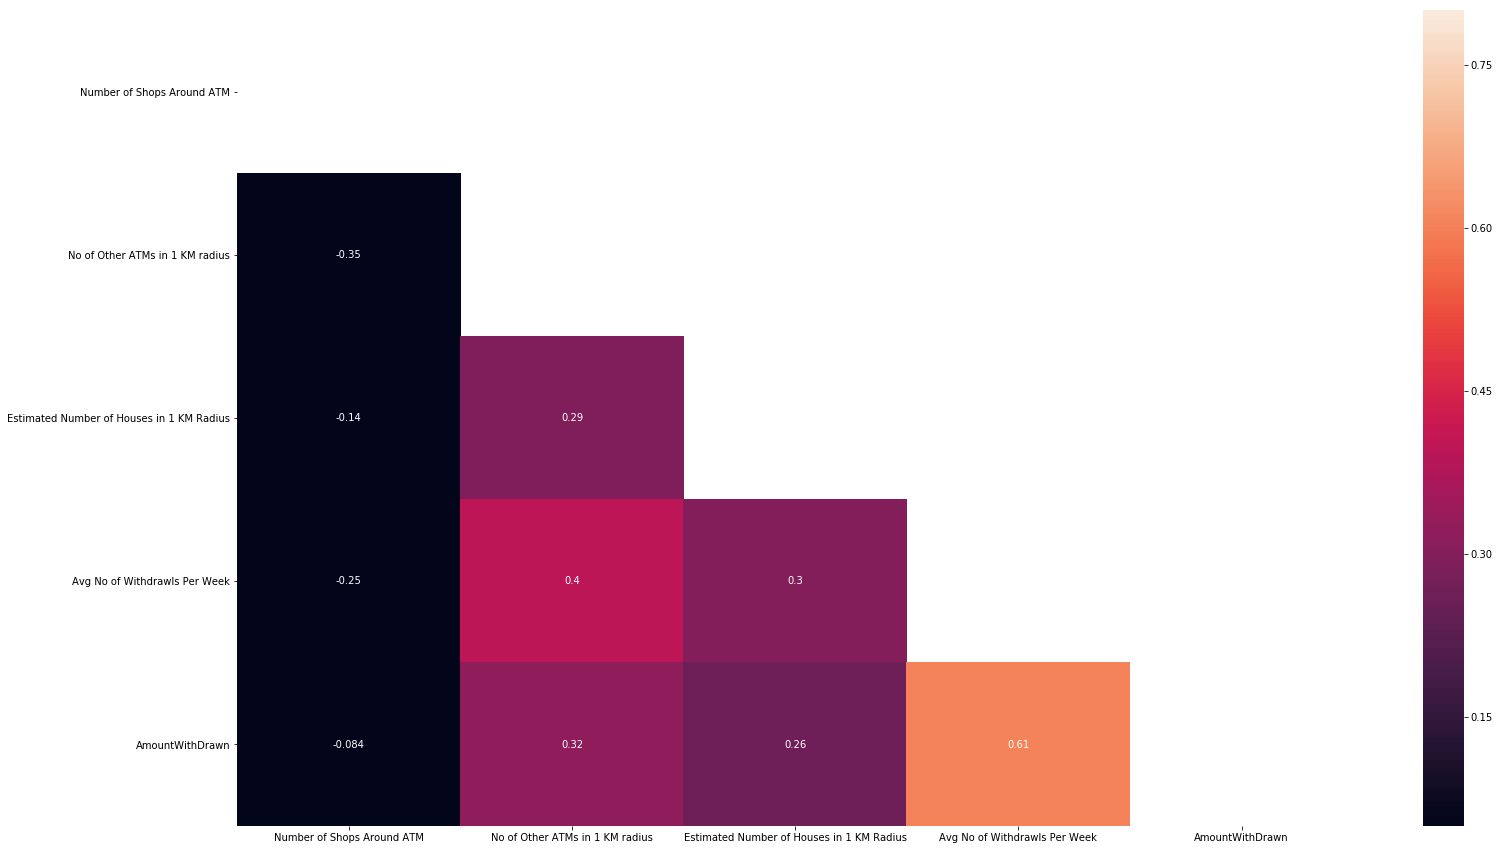

In [0]:
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(corr_matrix, mask=mask, vmax=0.8, vmin=0.05, annot=True);

Text(0.5, 1.0, 'Brief Correlation Graph')

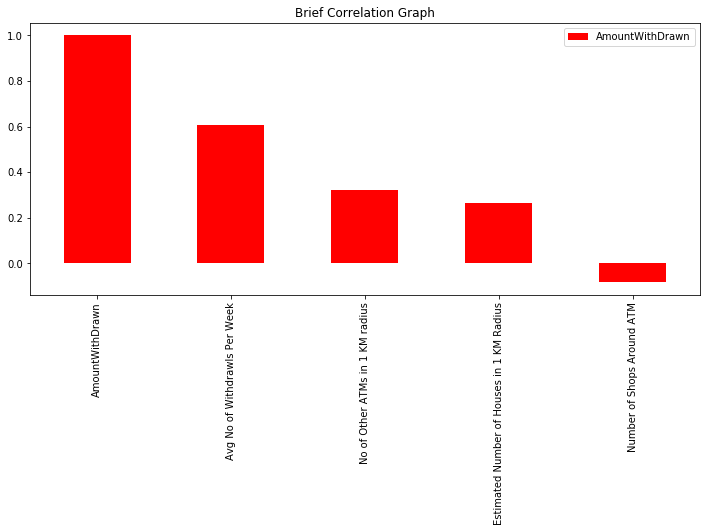

In [0]:
#COLUMNS THAT ARE CORRELATED TO THE SALES PRICE AND INVESLY CORRELATED TO AmountTransacted 
temp_df=pd.DataFrame(dataset.corr()[target].sort_values(ascending=False))
temp_df.plot(kind='bar',figsize=(12,5),color='red')
plt.title('Brief Correlation Graph')

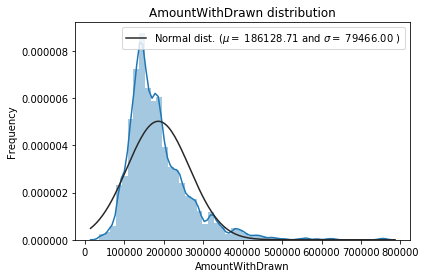

In [0]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
(mu, sigma) = norm.fit(dataset[target])

(mu, sigma) = norm.fit(dataset[target])
sns.distplot(dataset[target],fit=norm)
plt.ylabel('Frequency')
plt.title(f'{target} distribution')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')



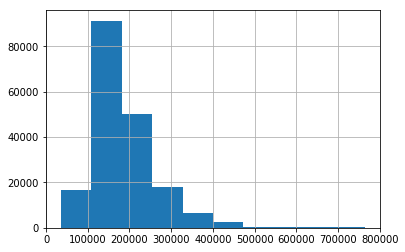

In [0]:
dataset[target].hist()

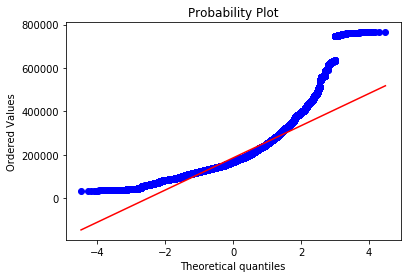

In [0]:
quantile_plot=stats.probplot(dataset[target], plot=plt)

In [0]:
dataset[target] = np.log1p(dataset[target])
y=dataset[target]
y.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    12.252484
1    12.124326
2    12.352339
3    11.874794
4    12.451373
Name: AmountWithDrawn, dtype: float64

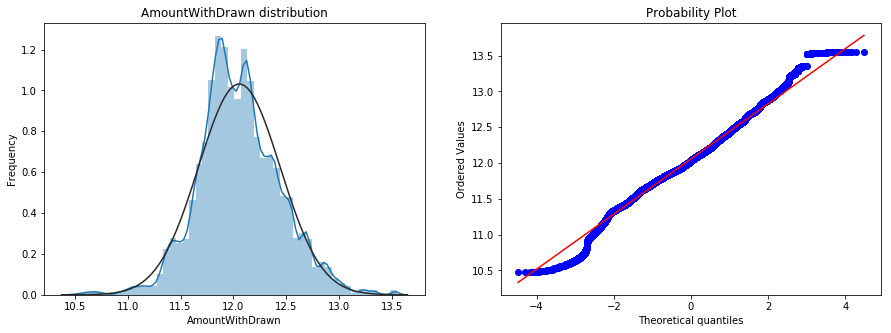

In [0]:
(mu, sigma) = norm.fit(dataset[target])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(dataset[target],fit=norm)
plt.ylabel('Frequency')
plt.title(f'{target} distribution')
plt.subplot(1, 2, 2)
quantile_plot=stats.probplot(dataset[target], plot=plt)

In [0]:
df_all = pd.get_dummies(dataset)

In [0]:
df_all.shape

(186880, 97)

In [0]:
train_length = round(df_all.shape[0]*0.70)

In [0]:
X_test=df_all.iloc[train_length:,:]
X_train=df_all.iloc[:train_length,:]

In [0]:
X_train.shape,X_test.shape

((130816, 97), (56064, 97))

In [0]:

df_all.head()

,Number of Shops Around ATM,No of Other ATMs in 1 KM radius,Estimated Number of Houses in 1 KM Radius,Avg No of Withdrawls Per Week,AmountWithDrawn,ATM Zone_C,ATM Zone_FV,ATM Zone_RH,ATM Zone_RL,ATM Zone_RM,ATM Placement_Facing Road,ATM Placement_Little Inside,ATM TYPE_Bigger Towns,ATM TYPE_Semi Urban,ATM TYPE_Town,ATM TYPE_Urban,ATM Location TYPE_Checkdrop and Withdraw,ATM Location TYPE_Deposit and Withdraw,ATM Location TYPE_Only WIthdraw,ATM Location TYPE_Passbook Printing and Withdraw,ATM looks_New,ATM looks_Normal,ATM looks_Old and Dull,ATM Near_2+ ATMS Very Close,ATM Near_Bazzar,ATM Near_Church,ATM Near_College,ATM Near_Food Joints,ATM Near_Govt Buildings,ATM Near_Highway,ATM Near_Hospital,ATM Near_IT park,ATM Near_Local Attraction,ATM Near_Local Transport,ATM Near_Lodge and Hotel,ATM Near_Market,ATM Near_Office Area,ATM Near_Park,ATM Near_Railway Station,ATM Near_Residential,...,Avg Withdrawls Per Hour_9,Avg Withdrawls Per Hour_10,ATM Attached to_Building,ATM Attached to_Flat,ATM Attached to_House,ATM Attached to_Petrol Bunk,ATM Attached to_Shed,ATM Attached to_Shop,Average Wait Time_0,Average Wait Time_1,Average Wait Time_2,Average Wait Time_3,Average Wait Time_4,Average Wait Time_5,Average Wait Time_6,Average Wait Time_8,Day Type_Festival,Day Type_National Holiday,Day Type_Strike,Day Type_Working,ATM RATING_2,ATM RATING_3,ATM RATING_4,ATM RATING_5,ATM Prox_2 ATM Machines (Same Bank),ATM Prox_2 ATMS in same Building,ATM Prox_2+ ATMS Very Close,ATM Prox_Attached to Branch,ATM Prox_Non Closed ATM,ATM Prox_Other Bank ATM,ATM Since_2006,ATM Since_2007,ATM Since_2008,ATM Since_2009,ATM Since_2010,Holiday Sequence_HH,Holiday Sequence_HW,Holiday Sequence_Long Weekend,Holiday Sequence_WH,Holiday Sequence_WW
0,66,65,8450,856,12.252484,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,26,80,9600,1262,12.124326,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,65,68,11250,920,12.352339,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,80,60,9550,961,11.874794,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,66,84,14260,1145,12.451373,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [0]:
#Lasso Regression
X= X_train.drop(target,axis = 1).copy()
y = X_train[target].copy()
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005)
lasso.fit(X,y)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
test_x = X_test.drop(target,axis=1)
test_y = X_test[target]
test_lasso=np.expm1(lasso.predict(test_x))

In [0]:
results_df=pd.DataFrame(test_lasso,columns=[f'Predicted_{target}'])
results_df[f'Actual_{target}']=np.expm1(test_y.values)

In [0]:
preds= test_lasso.copy()
results_df=pd.DataFrame(preds,columns=[f'Predicted_{target}'])
results_df[f'Actual_{target}']=np.expm1(test_y.values)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(results_df.values[0],results_df.values[1]))



189087.42068169164

In [0]:
#Random Forest Regression

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
forest=RandomForestRegressor(random_state=42)

In [0]:
forest.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
yr=np.expm1(forest.predict(test_x))

In [0]:
preds= yr.copy()
results_df=pd.DataFrame(preds,columns=[f'Predicted_{target}'])
results_df[f'Actual_{target}']=np.expm1(test_y.values)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(results_df.values[0],results_df.values[1]))



217943.04390728506

In [0]:
#Ridge Regression

from sklearn.linear_model import Ridge

In [0]:
ridge=Ridge()
ridge.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_re=np.expm1(ridge.predict(test_x))

In [0]:
preds= y_re.copy()
results_df=pd.DataFrame(preds,columns=[f'Predicted_{target}'])
results_df[f'Actual_{target}']=np.expm1(test_y.values)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(results_df.values[0],results_df.values[1]))



216399.33078219075